In [1]:
import os
os.chdir('D:/IIM/Competitions/Resolvr') # changing working directory to required file location
os.getcwd()

'D:\\IIM\\Competitions\\Resolvr'

In [136]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font='sans-serif', color_codes = True)
%matplotlib inline

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('resolvr.csv')
data.head().T

,0,1,2,3,4
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Non Business,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3
Gate location,1,3,2,5,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129840 entries, 0 to 129839
Data columns (total 25 columns):
Gender                               129840 non-null object
Customer Type                        129840 non-null object
Age                                  129840 non-null int64
Type of Travel                       129840 non-null object
Class                                129840 non-null object
Flight Distance                      129840 non-null int64
Inflight wifi service                129840 non-null float64
Departure/Arrival time convenient    129840 non-null float64
Ease of Online booking               129840 non-null float64
Gate location                        129840 non-null float64
Food and drink                       129840 non-null float64
Online boarding                      129840 non-null float64
Seat comfort                         129840 non-null float64
Inflight entertainment               129840 non-null float64
On-board service                     129840

In [159]:
interval = data.iloc[:,6:20]

In [5]:
target = data.satisfaction.values

In [6]:
features = data.drop(['satisfaction','Departure Delay in Minutes','Arrival Delay in Minutes'], axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state=42)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='error', drop = 'first'))])

In [9]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
model = make_pipeline(
    preprocessor,
    LogisticRegression())

In [11]:
model.fit(X_train, y_train)
print("logistic regression train score: %f" % model.score(X_train, y_train))
print("logistic regression test score: %f" % model.score(X_test, y_test))

logistic regression train score: 0.875443
logistic regression test score: 0.873229


In [80]:
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)
print("AUC for Logistic Regression model is : " , round(roc_auc_score(y_test, y_pred),2))

AUC for Logistic Regression model is :  0.87


In [91]:
y_prob_lr = model.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.928


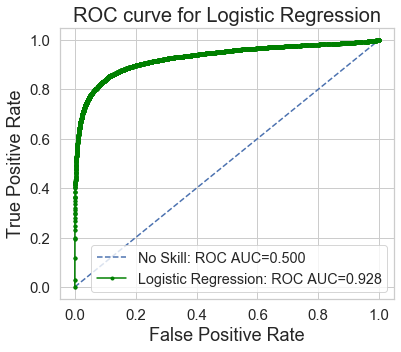

In [148]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]

# predicting probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize= (6,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill: ROC AUC=0.500')
plt.plot(lr_fpr, lr_tpr, marker='.', color = "Green", label='Logistic Regression: ROC AUC=0.928')
# axis labels
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title("ROC curve for Logistic Regression", fontsize =20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# show the legend
plt.legend(fontsize = "x-large")
# show the plot
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'logisticregression__C': [0.01,0.1, 1.0, 10.0,50.0],
    }

In [62]:
grid_clf = GridSearchCV(model, param_grid, cv=10, iid=False)
grid_clf.fit(X_train, y_train);

In [63]:
grid_clf.best_params_

{'logisticregression__C': 0.1}

In [64]:
print("best logistic regression from grid search: %f" % grid_clf.best_estimator_.score(X_test, y_test))

best logistic regression from grid search: 0.873190


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test = model.predict(X_test)

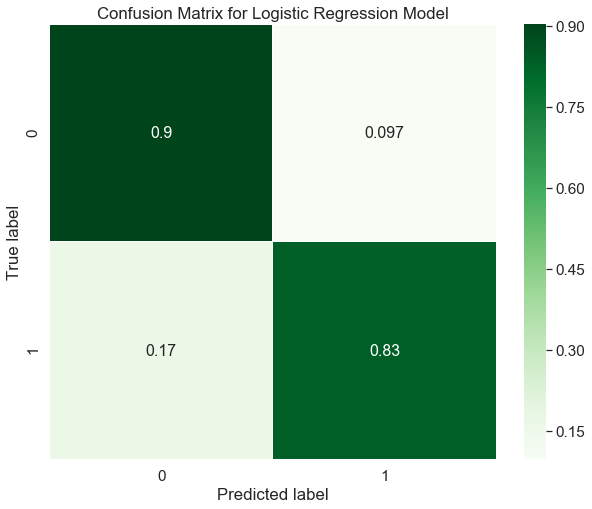

In [33]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':16},
            cmap=plt.cm.Greens,linewidths=0.2)


plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [62]:
print(classification_report(y_test, y_pred_test))
report = classification_report(y_test, y_pred_test, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("LR_report.csv")

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14685
           1       0.87      0.83      0.85     11283

    accuracy                           0.87     25968
   macro avg       0.87      0.87      0.87     25968
weighted avg       0.87      0.87      0.87     25968



In [154]:
X_1 = pd.get_dummies(X_train, drop_first = True)

In [197]:
coef_table = pd.DataFrame(list(X_1.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coeffs",model.named_steps['logisticregression'].coef_.transpose())

In [199]:
coef_table["ΔOdds"] = np.exp(coef_table['Coeffs'])
coef_table = coef_table.rename(columns={0: "Features"})
coef_table.sort_values(by = "ΔOdds", ascending = False)


,Features,Coeffs,ΔOdds
7,Online boarding,0.824320,2.280330
2,Inflight wifi service,0.544197,1.723225
13,Checkin service,0.408212,1.504126
10,On-board service,0.392300,1.480381
11,Leg room service,0.331552,1.393129
15,Cleanliness,0.300456,1.350474
12,Baggage handling,0.152391,1.164615
14,Inflight service,0.151163,1.163187
8,Seat comfort,0.085669,1.089446
9,Inflight entertainment,0.065524,1.067719


In [61]:
coef_table.to_csv("Odds_Ratio.csv", index = False)

In [188]:
mean_table = pd.DataFrame(list(interval.columns)).copy()
mean_table.insert(len(mean_table.columns),"Mean",round(np.mean(data[interval.columns],axis = 1),2))
mean_table = mean_table.rename(columns={0: "Features"})

In [189]:
mean_table['Std dev'] = round(np.std(data[interval.columns],axis = 1),2)
mean_table

,Features,Mean,Std dev
0,Inflight wifi service,3.86,1.12
1,Departure/Arrival time convenient,2.29,1.28
2,Ease of Online booking,3.71,1.22
3,Gate location,3.00,1.41
4,Food and drink,3.50,0.73
5,Online boarding,2.50,1.30
6,Seat comfort,4.50,0.63
7,Inflight entertainment,2.07,1.03
8,On-board service,2.93,0.70
9,Leg room service,3.57,1.24


In [191]:
mean_table.to_csv("mean_stddev.csv",index = False)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [64]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'ln(Dep_Delay)', 'ln(Arr_Delay)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                     

In [65]:
round(rf.score(X_train, y_train),2)

1.0

In [66]:
round(rf.score(X_test,y_test),2)

0.96

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
y_pred_test = rf.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred_test)

0.9633009858287123

In [78]:
from sklearn.metrics import roc_auc_score
print("AUC for Random forest model is : " , round(roc_auc_score(y_test, y_pred_test),2))

AUC for Random forest model is :  0.96


In [93]:
y_prob_rf = rf.predict_proba(X_test)

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.994


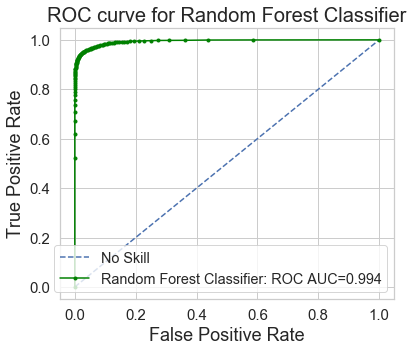

In [153]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]

# predicting probabilities
lr_probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize= (6,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color = "Green", label='Random Forest Classifier: ROC AUC=0.994')
# axis labels
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title("ROC curve for Random Forest Classifier", fontsize =20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# show the legend
plt.legend(fontsize = "x-large",loc = 4)
# show the plot
plt.show()

In [189]:
confusion_matrix(y_test, y_pred_test)


array([[14371,   314],
       [  637, 10646]], dtype=int64)

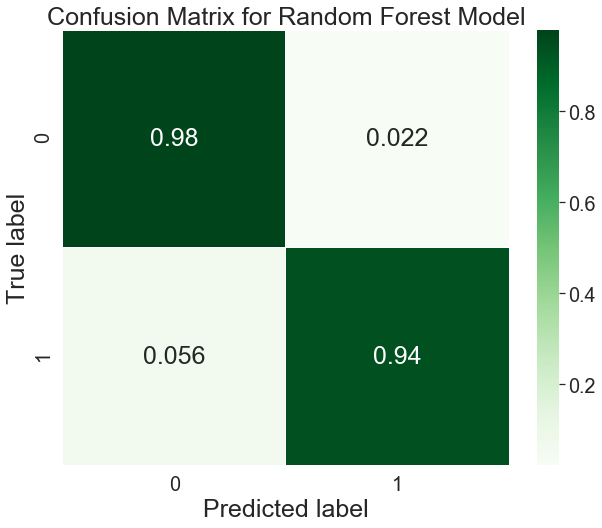

In [129]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,8))
sns.set(font_scale=1.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':25},
            cmap="Greens",linewidths=0.2)


plt.xlabel('Predicted label',fontsize = 25)
plt.ylabel('True label',fontsize = 25)
plt.title('Confusion Matrix for Random Forest Model',fontsize = 25)

plt.show()

In [150]:
print(classification_report(y_test, y_pred_test))
report = classification_report(y_test, y_pred_test, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("rf_report.csv")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14685
           1       0.97      0.94      0.96     11283

    accuracy                           0.96     25968
   macro avg       0.96      0.96      0.96     25968
weighted avg       0.96      0.96      0.96     25968



In [72]:
model = rf.fit(X_train, y_train)

In [79]:
#from sklearn.tree import export_graphviz
#estimator = rf[1].estimators_[1]
#features = ['Class_Non Business','Type of Travel_Personal Travel', 'Online Boarding']
# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', feature_names = X_1.columns,class_names = 'satisfaction', rounded = True, proportion = False, precision = 2, filled = True)

In [80]:
#import pydot

#(graph,) = pydot.graph_from_dot_file('tree.dot')


In [81]:
#graph.write_svg('graph.svg')

In [82]:
rf[1]

RandomForestClassifier()

In [74]:
X = pd.get_dummies(features, drop_first = True)

In [184]:
fi_values = {'Features':X.columns,'Importance':rf[1].feature_importances_}
feature_importance = pd.DataFrame(fi_values)
feature_importance['Importance'] = round(100*feature_importance['Importance'],2)

In [185]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)
#feature_importance.to_csv("FeatureImp.csv")

In [147]:
# Random forest is good for prediction, but being a black box model, its hard to interpret

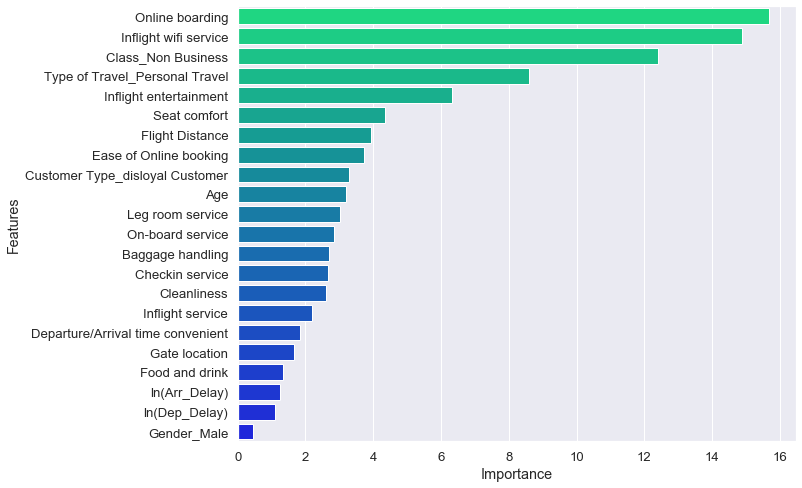

In [186]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2, palette = customPalette)
sns.barplot(x = 'Importance', y = 'Features', palette = "winter_r" , data = feature_importance

In [87]:
target = data.satisfaction.values
features = data.drop(['satisfaction','Departure Delay in Minutes','Arrival Delay in Minutes'], axis = 1)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='error', drop = 'first'))])

In [10]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state=42)

In [41]:
X_1 = pd.get_dummies(X_train, drop_first = True)

In [12]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),])

In [154]:
X_train_prep = pd.DataFrame(pipe.fit_transform(X_train),columns = X_1.columns)
X_test_prep = pd.DataFrame(pipe.fit_transform(X_test),columns = X_1.columns)

In [14]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train,X_train_prep)
results_log_reg = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.347259
         Iterations 7


In [95]:
LRresult = (results_log_reg.summary().tables[1])
LRresult = pd.DataFrame(LRresult)
LRresult.to_csv("LRresult.csv",index = False)

In [96]:
# odds ratios and 95% CI
params = results_log_reg.params
conf = results_log_reg.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
conf = np.exp(conf)
conf.sort_values(by = 'OR', ascending = False)

,2.5%,97.5%,OR
Online boarding,2.471000,2.604585,2.536913
Gender_Male,1.786972,1.906686,1.845859
Inflight wifi service,1.619199,1.717061,1.667412
On-board service,1.465920,1.541980,1.503469
Checkin service,1.437237,1.498126,1.467366
Leg room service,1.385872,1.447447,1.416325
Cleanliness,1.218113,1.293780,1.255376
Flight Distance,1.188783,1.237435,1.212865
Inflight entertainment,1.105086,1.188367,1.145970
Baggage handling,1.105648,1.164275,1.134583


In [164]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf[1], random_state=1).fit(X_test_prep,y_test )

Weight,Feature
0.1350 ± 0.0044,Type of Travel_Personal Travel
0.1333 ± 0.0027,Inflight wifi service
0.0532 ± 0.0030,Customer Type_disloyal Customer
0.0354 ± 0.0019,Online boarding
0.0259 ± 0.0023,Checkin service
0.0205 ± 0.0011,Class_Non Business
0.0204 ± 0.0011,Baggage handling
0.0189 ± 0.0014,Seat comfort
0.0181 ± 0.0008,Inflight service
0.0151 ± 0.0013,Cleanliness


In [163]:
X_test_prep = pd.DataFrame(pipe.fit_transform(X_test),columns = X_1.columns)

In [171]:
eli5.show_weights(perm, feature_names = X_test_prep.columns.tolist())

Weight,Feature
0.1350 ± 0.0044,Type of Travel_Personal Travel
0.1333 ± 0.0027,Inflight wifi service
0.0532 ± 0.0030,Customer Type_disloyal Customer
0.0354 ± 0.0019,Online boarding
0.0259 ± 0.0023,Checkin service
0.0205 ± 0.0011,Class_Non Business
0.0204 ± 0.0011,Baggage handling
0.0189 ± 0.0014,Seat comfort
0.0181 ± 0.0008,Inflight service
0.0151 ± 0.0013,Cleanliness
